In [1]:
from data_processing import read_data, split_data, visualize_data
from classification_models import Classifier

import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

## Dataset:
Function ***read_data*** is used to read the data from the file located at the path provided. Here, I have used the ***vehicles.csv*** dataset.

In [3]:
X, y, class_map, _, _ = read_data('../../datasets/vehicles.csv')

,Mapping
0,bus
1,opel
2,saab
3,van


## Visualizing the Data:
The data is visualized using ***PCA*** (or ***LDA*** if required,) using the ***visualize_data*** function. Here we also Scree plot with the first 8 principal components in consideration.

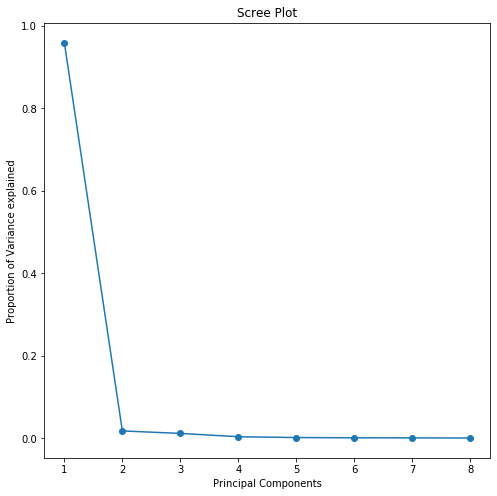

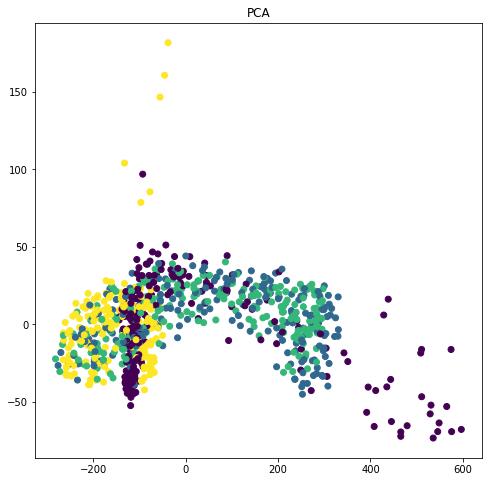

In [4]:
status = visualize_data('PCA', X, y, 8)

## Data Split:
The dataset is split into ***training*** and ***testing*** datasets, where ***75%*** of the dataset is training data and ***25%*** is test data.

In [5]:
X_train, X_test, y_train, y_test = split_data(X, y)

## Multi Layer Perceptron:
### Model Details:
For the purpose of classifying the dataset, I have trained the ***MLP Classifier***, which has an architecture of 1 input, 1 hidden and 1 output layer of sizes 300, 200 and 150 respectively. The classifier uses ***ReLu*** activation function.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.938776,0.920000,0.958333,48.000000
1,0.654545,0.600000,0.720000,50.000000
2,0.607843,0.688889,0.543860,57.000000
3,0.947368,0.947368,0.947368,57.000000
accuracy,0.787736,0.787736,0.787736,0.787736
macro avg,0.787133,0.789064,0.792390,212.000000
weighted avg,0.785073,0.789748,0.787736,212.000000


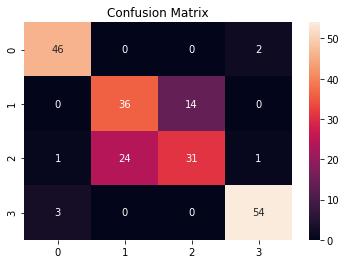

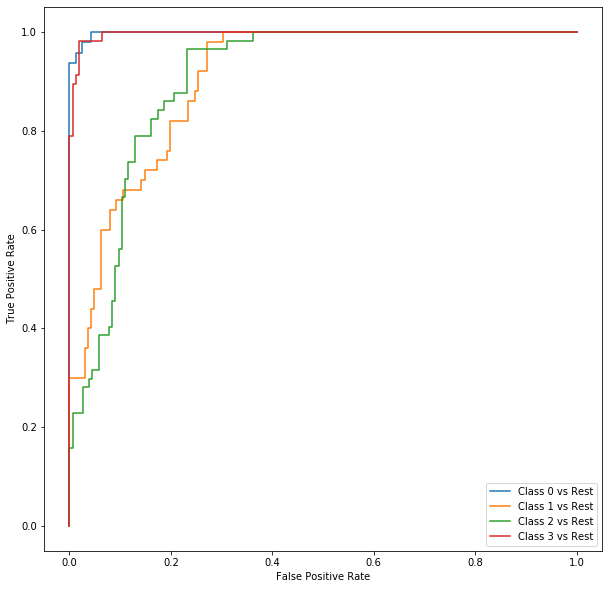

AUROC Score for Class 0: 0.9983485772357723
AUROC Score for Class 1: 0.9066666666666667
AUROC Score for Class 2: 0.9037917374080362
AUROC Score for Class 3: 0.9966044142614602


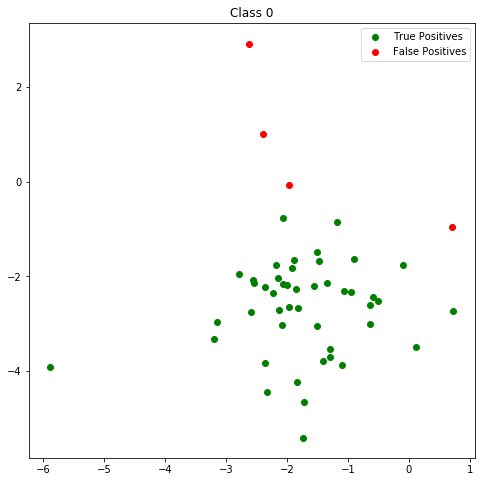

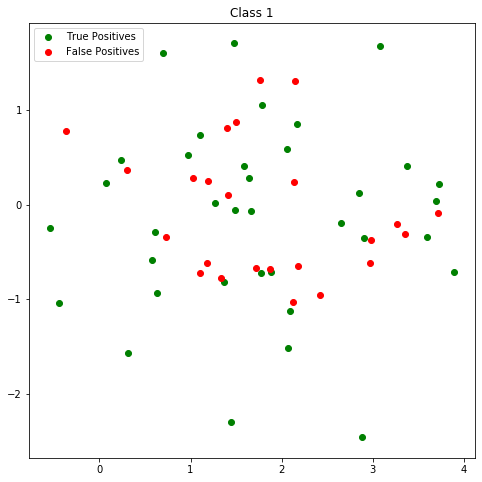

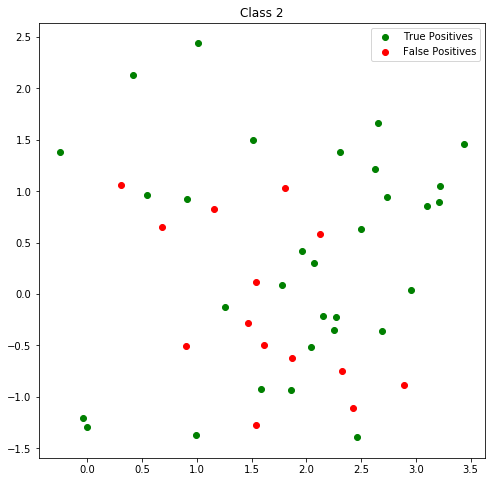

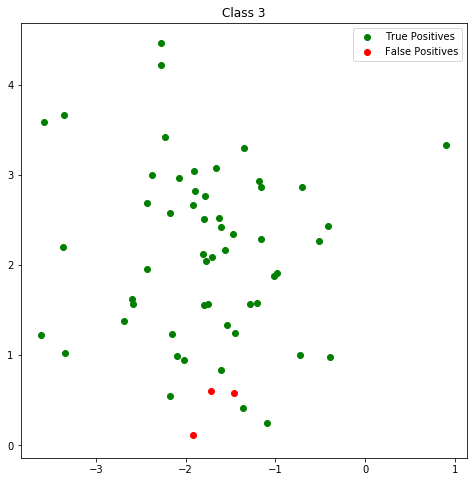

In [6]:
mlp_model = Classifier(model='mlp', hidden_size = (300, 200, 150))
mlp_model.train(X_train, y_train)
mlp_model.validate(X_test, y_test)
mlp_report = mlp_model.show_report()
mlp_confusion = mlp_model.confusion_matrix()
mlp_auroc = mlp_model.AUROC()
mlp_model.show_misclassification(X_test, y_test)

## Logistic Regression:
### Model Details:
I have also trained ***Logistic Regression Classifier***, that uses the ***newton-cg*** solver.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.949495,0.921569,0.979167,48.000000
1,0.568421,0.600000,0.540000,50.000000
2,0.596491,0.596491,0.596491,57.000000
3,0.965517,0.949153,0.982456,57.000000
accuracy,0.773585,0.773585,0.773585,0.773585
macro avg,0.769981,0.766803,0.774529,212.000000
weighted avg,0.769016,0.765741,0.773585,212.000000


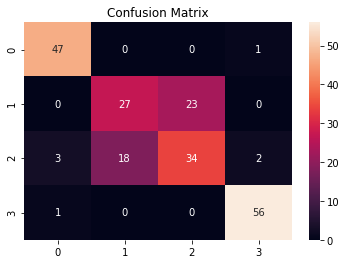

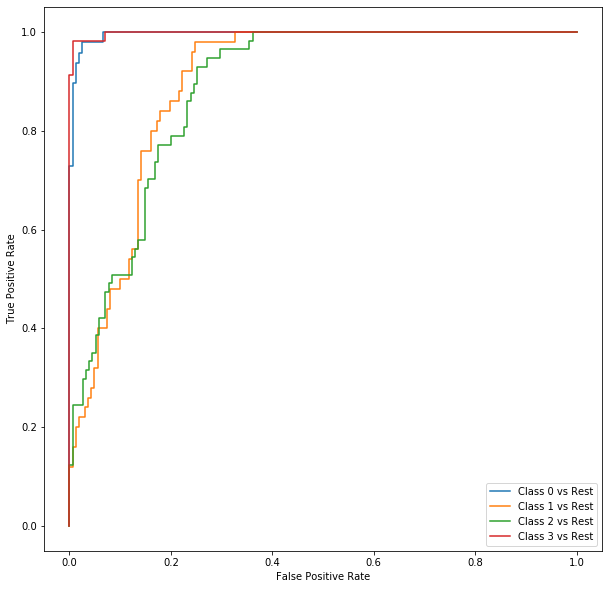

AUROC Score for Class 0: 0.9961890243902438
AUROC Score for Class 1: 0.895679012345679
AUROC Score for Class 2: 0.8865874363327674
AUROC Score for Class 3: 0.9983022071307301


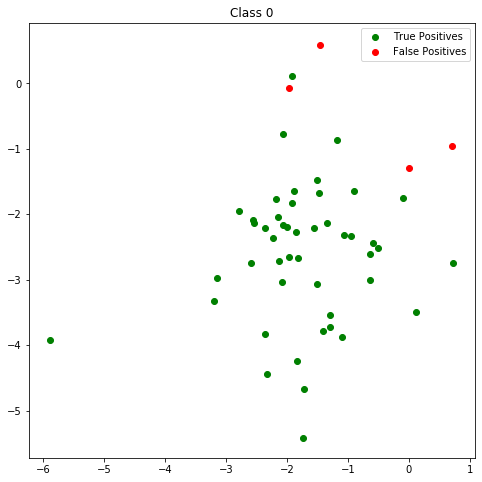

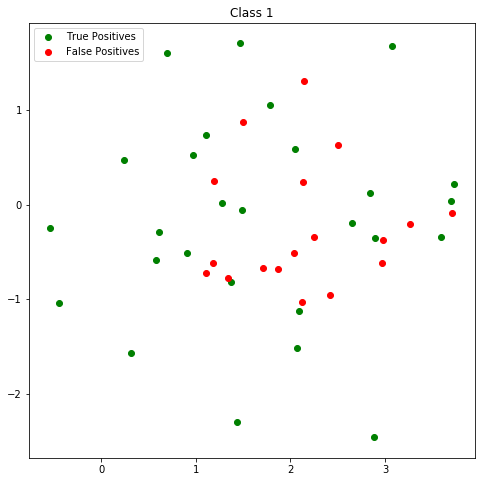

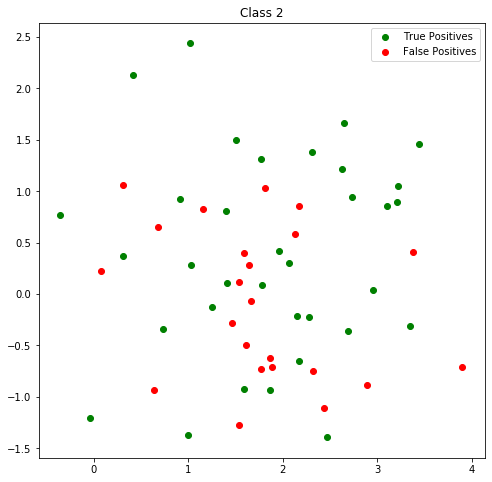

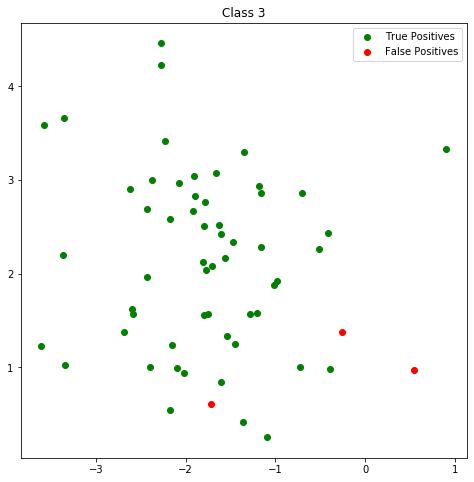

In [7]:
logistic_model = Classifier(model='logistic', solver='newton-cg', multi_class='multinomial')
logistic_model.train(X_train, y_train)
logistic_model.validate(X_test, y_test) 
logistic_report = logistic_model.show_report()
logistic_confusion = logistic_model.confusion_matrix()
logistic_auroc = logistic_model.AUROC()
logistic_model.show_misclassification(X_test, y_test)